In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
print(sklearn.__version__)

1.8.0


- In sklearn versions $\, \ge 1.8, \,$ the solver now automatically detects whether to use multiclass classification or not (i.e., if there are more than two classes in the target).

### Utility functions

In [23]:
def plot_decision_boundary(X, y, clf):
    fig, ax = plt.subplots(figsize=(8,6))
    
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 0].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Make a Prediction on every grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Blues)
    
    # Define markers and colors for each (both) class
    markers = ['o', '^', '*']
    colors = ['black', 'orange', 'yellow']
    labels = np.unique(y)
    
    # Plot the original data (each class with a different marker and color)
    for i, label in enumerate(labels):
        X_sub = X[y == label]
        ax.scatter(X_sub[:, 0], 
                   X_sub[:, 1], 
                   marker=markers[i], 
                   color=colors[i], 
                   label=f'Class {label}')
    ax.set_xlabel('Petal length (standardized)')
    ax.set_ylabel('Petal width (standardized)')
    ax.set_title('Logistic regression classifier decision boundary')
    ax.legend(loc='upper left')
    plt.tight_layout();

In [5]:
def viz_training_progress(clf):
    log_loss = clf.losses_
    eta = clf.eta
    r = np.arange(1, len(log_loss) + 1)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(r, log_loss, marker='o', zorder=2, markerfacecolor='none', markeredgecolor='black')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss function (log-loss)')
    ax.set_title(f'Learning rate = {eta}')
    ax.grid(True, alpha=0.3, zorder=1);

### Load  data

In [6]:
iris = load_iris(as_frame=True)
df = pd.concat([iris.data, iris.target], axis=1)

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values

In [8]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


### Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(120, 2)
(120,)
(30, 2)
(30,)
(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


### Feature scaling

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model training

In [12]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

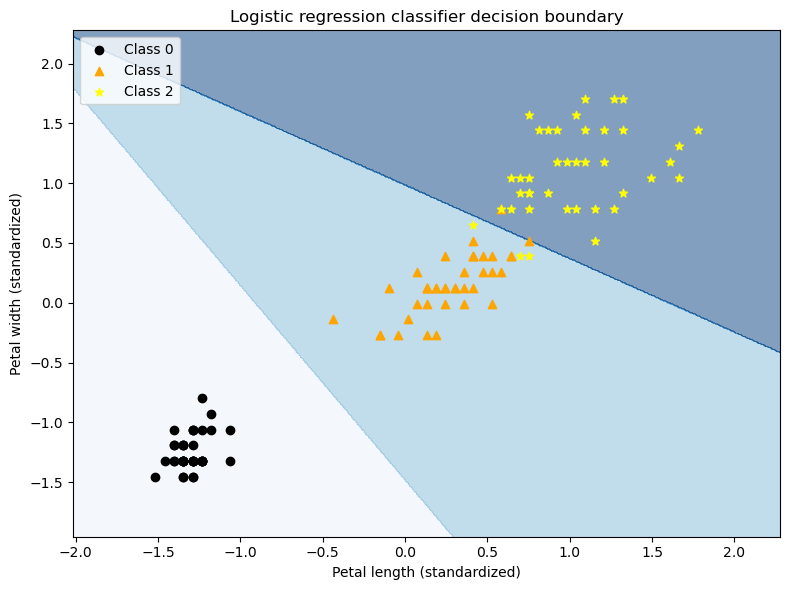

In [24]:
plot_decision_boundary(X=X_train_scaled, y=y_train, clf=model)

### Model evaluation

In [28]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred).round(3)

In [29]:
# Training accuracy
y_pred_train = model.predict(X_train_scaled)  
accuracy(y_true=y_train, y_pred=y_pred_train)

np.float64(0.967)

In [30]:
# Test accuracy
y_pred_test = model.predict(X_test_scaled)
accuracy(y_true=y_test, y_pred=y_pred_test)

np.float64(0.933)

- Note that the `predict()` method predicts a class.
- To predict the probability of belonging to class 1 (that is, $\, P(y^{(i)}=1|\boldsymbol{x}^{(i)}), \,$ one has to use the `predict_proba()` method.

In [33]:
model.predict_proba(X_test_scaled)[:5].round(2)

array([[0.97, 0.03, 0.  ],
       [0.  , 0.35, 0.65],
       [0.22, 0.77, 0.01],
       [0.22, 0.77, 0.01],
       [0.97, 0.03, 0.  ]])

- Since this is multiclass classification, each column represents the probability that the given data point belongs to a particular class (note that each row sums to 1).
- If we trained a binary classifier, then the first column would represent the probability $\, P(y^{(i)}=0|\boldsymbol{x}^{(i)}), \,$ and the second column the probability $\, P(y^{(i)}=1|\boldsymbol{x}^{(i)}). \,$
- Every instance gets assigned to the class with the highest probability.

In [35]:
model.predict(X_test_scaled)[:5][:, np.newaxis]

array([[0],
       [2],
       [1],
       [1],
       [0]])